In [1]:
import os
import soundfile  as sf
import matplotlib.pyplot as plt
import numpy as np
import librosa
from util import audio,my_util
import copy as cp
import scipy
from scipy.signal import find_peaks
import IPython.display as ipd

def amp2db(x):
    return 20 * np.log10(np.maximum(1e-5, x))
def db2amp(x):
    return np.power(10.0, x * 0.05)
# my_util.wavPlayer('./my_a.wav')
# my_util.wavPlayer('./my_i.wav')
# my_util.wavPlayer('./my_u.wav')
# my_util.wavPlayer('./my_e.wav')
# my_util.wavPlayer('./my_o.wav')

def modify_specEnv(X,curve):
    assert(X.shape[0] ==len(curve))
    _X = cp.copy(X)
    for i in range(_X.shape[1]):
        _X[:,i] *= curve 
    return _X


C:\Users\a1989\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [113]:
x,fs = sf.read('./my_o.wav')
# x = librosa.effects.time_stretch(x, 0.5)
ipd.Audio(x, rate=fs)

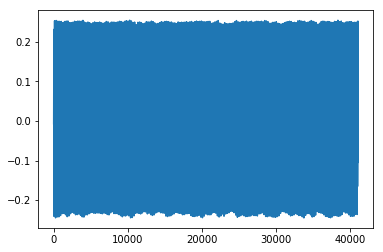

In [181]:
## frame_period = 10
which_seg = 10
showN = 400
_NFFT_ = 8192
frame_period = 10
fs = 44100
rate = 1.0
def getAmpPha(src):
    x,fs = sf.read(src)
    try:
        if x.shape[1] == 2:
            x = (x[:,0]+x[:,1])/2
    except:pass
    
    X = librosa.stft(x,n_fft=_NFFT_,win_length = 8192, hop_length=int(44100/(1000/frame_period)))
    absX = np.abs(X)
    phaX = X/absX
    return absX,phaX
def getCurve(seg_A,seg_B):
    peaks_A, _ = find_peaks(seg_A, distance=30)
    peaks_B, _ = find_peaks(seg_B, distance=30)
    peaks_A =  np.insert(peaks_A, 0, 0, axis=0)
    peaks_B =  np.insert(peaks_B, 0, 0, axis=0)
    

    tck = scipy.interpolate.splrep(peaks_A,seg_A[peaks_A], s=0)
    c1 = scipy.interpolate.splev(range(showN), tck, der=0)
    tck = scipy.interpolate.splrep(peaks_B,seg_B[peaks_B], s=0)
    c2 = scipy.interpolate.splev(range(showN), tck, der=0)
    
#     c2 = scipy.interpolate.spline(peaks_B,seg_B[peaks_B],range(showN))
    c1 = np.maximum(c1,0.5)
    curve = np.power(10,c2-c1)

    
    return curve
#t_path: Timbre path , v_path: Vowel path
def vowel_replace(t_path,v_path,it = 2):
    
    absi,phai = getAmpPha(t_path)
    absa,_ = getAmpPha(v_path)

    ###################################
    seg_A = cp.copy(absi[:showN,which_seg])
#     seg_GT = cp.copy(absGT[:showN,which_seg])
    seg_B = cp.copy(absa[:showN,which_seg])

    seg_A_log = np.log10(seg_A)
    seg_B_log = np.log10(seg_B)

    curve_ = getCurve(seg_A_log,seg_B_log)*rate

    seg_A *=curve_
#     plt.plot(curve_)
#     plt.show()
    
    for i in range(it):
        seg_A_log = np.log10(seg_A)
        curve_tmp = getCurve(seg_A_log,seg_B_log)*rate
        curve_ *= curve_tmp
        seg_A *=curve_tmp

    curve = np.ones((int(_NFFT_/2)+1,))

    curve[:showN] = curve_
    # curve[:10]  = 1
    out = modify_specEnv(absi,curve)
    xx = librosa.istft(out*phai,hop_length=int(44100/(1000/frame_period)))
    xx = xx[1500:-1500]
    xx = xx/(max(xx)-min(xx))*0.5
    return xx
demo_path = './demo'

t_path = demo_path + '/Singer1'+ '/i'+'.wav'
v_path = demo_path + '/Singer2'+ '/a'+'.wav'
xx = vowel_replace(t_path,v_path,0)

gt_src,fs = sf.read(demo_path + '/Singer1'+ '/a'+'.wav')
v_src,fs = sf.read(v_path)
t_src,fs = sf.read(t_path)

# v_src,fs = sf.read(src)

plt.plot(xx)
# ipd.Audio(xx, rate=fs)
sf.write('test.wav',xx,fs)
my_util.wavPlayer('./test.wav')
my_util.wavPlayer(t_path)
my_util.wavPlayer(v_path)

a_path = demo_path + '/Singer1'+ '/a'+'.wav'
my_util.wavPlayer(a_path)

# ipd.Audio(gt_src, rate=fs)
# ipd.Audio(v_src, rate=fs)



# Generate questions

In [156]:
n_lst = []
# data_path = './gliss_long_G3/'
data_path = './all_sustain/'


# for who_i,who in enumerate(os.listdir('all_sustain')):  
for who_i,who in enumerate(os.listdir(data_path)):  

    print(who_i,who)
    n_lst.append(who)

0 Abun
1 boton
2 cos
3 Jenna
4 LISA
5 Namita
6 乙彤
7 亭鈞
8 偉晉
9 君豪
10 士峰
11 妤瑄
12 子齊
13 學煒
14 展延
15 徐葳
16 志祥
17 我
18 敬恆
19 昱嘉
20 漢文
21 瀞云
22 繁傑
23 聖倫
24 贊全
25 長霖


# Step 1: Copy data file to question dir

In [159]:
from shutil import copyfile
nQ = 10
v_1 = 'i'
v_2 = 'a'
#[20,12]
#[16,9]
#[9,22]
#25:bad /a/
who_lst = np.array([[17,0,20,1,13, 7,16, 17,22,24,17,23,15,8,20],
                    [0,20,1,13, 7,16, 17,22,24,17,23,15,8,20,17]]).transpose()

# who_lst = np.array([[0,1,2,3,4],
#                     [1,2,3,4,0]]).transpose()


assert(len(who_lst[0])==len(who_lst[1]))
Q_dir = './Q_dir/'

if not os.path.exists(Q_dir):
    os.makedirs(Q_dir)
Q_cnt = 0
logging_who = False
for a,b in who_lst:
    
    out_path = Q_dir+'Q_'+str(Q_cnt)+'/'
    if not os.path.exists(out_path):
        os.makedirs(out_path)
    copyfile(data_path+n_lst[a]+'/'+v_1+'.wav', out_path+'A_'+v_1+'.wav')
    copyfile(data_path+n_lst[a]+'/'+v_2+'.wav', out_path+'A_'+v_2+'.wav')
    copyfile(data_path+n_lst[b]+'/'+v_1+'.wav', out_path+'B_'+v_1+'.wav')
    copyfile(data_path+n_lst[b]+'/'+v_2+'.wav', out_path+'B_'+v_2+'.wav')
    
    if logging_who:
        open(out_path + n_lst[a]+'_'+n_lst[b]+".log", 'a').close()

    Q_cnt+=1
print('copy done')

copy done


# Step 2: Cross Synthesis

In [182]:
fs = 44100

for nQi,nQ in enumerate(os.listdir(Q_dir)):  
    print(nQi)
    a_path = Q_dir+ nQ + '/A_'+ v_1 + '.wav'
    b_path = Q_dir+ nQ + '/B_'+ v_2 + '.wav'
    a_path2 = Q_dir+ nQ + '/A_'+ v_2 + '.wav'
    b_path2 = Q_dir+ nQ + '/B_'+ v_1 + '.wav'
    
    out = vowel_replace(a_path,b_path)
    sf.write(Q_dir+ nQ + '/' + v_2+ '_TA' +'.wav', out, fs)
    out = vowel_replace(b_path,a_path)
    sf.write(Q_dir+ nQ + '/' + v_1 +'_TB' + '.wav', out, fs)
    
    out = vowel_replace(a_path2,b_path2)
    sf.write(Q_dir+ nQ + '/' + v_1+ '_TA' +'.wav', out, fs)
    out = vowel_replace(b_path2,a_path2)
    sf.write(Q_dir+ nQ + '/' + v_2 +'_TB' + '.wav', out, fs)
print('done')

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
done
